In [34]:
import torch as tor
import torch.nn as nn
import matplotlib.pyplot as plt
import sys

In [35]:
# create data
N = 200
x = tor.randn(N, 1)
y = x + tor.randn(N, 1) / 2

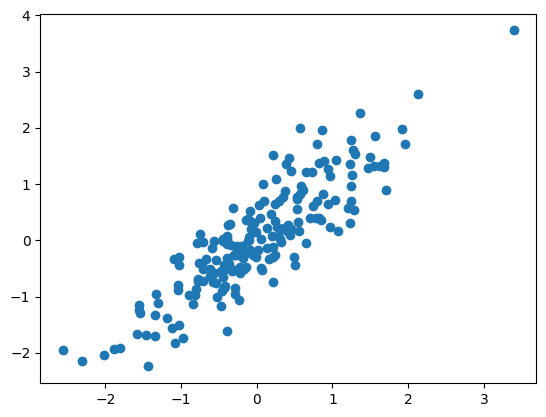

In [36]:
# plot 
plt.scatter(x, y)
plt.show()

In [37]:
# build model
regANN = nn.Sequential(
    nn.Linear(1, 1),  # input layer
    nn.ReLU(),  # activation function
    nn.Linear(1, 1),  # output layer
)

In [38]:
numepochs = 10000
LR = 0.01
# learning rate, loss function, optimizer, numepochs and losses
lossfun = nn.MSELoss()
# optimizer: type of gradient descent we want to use
optimizer = tor.optim.SGD(regANN.parameters(), lr=LR)

In [39]:
# training
losses = tor.zeros(numepochs)
for epoch in range(numepochs):
    # forward pass
    ycap = regANN(x)

    # compute loss
    loss = lossfun(ycap, y)
    losses[epoch] = loss
    msg =  f"Epoch {epoch+1:03}/{numepochs}, loss = {loss.item():.4f}"
    sys.stdout.write('\r' + msg)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 10000/10000, loss = 0.2203

In [40]:
# manually compute losses
predictions = regANN(x)
testloss = (predictions - y).pow(2).mean()

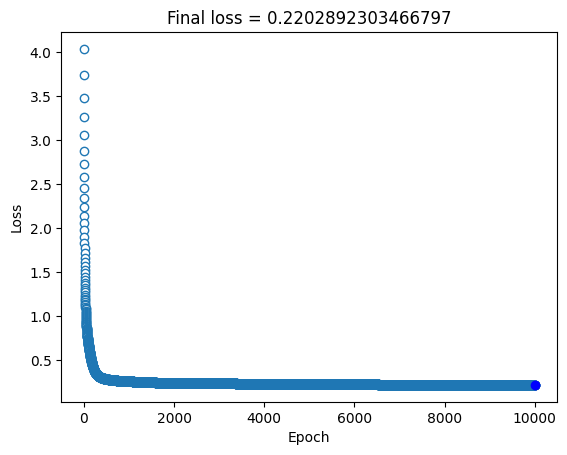

In [41]:
plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.plot(numepochs, testloss.detach(), "bo")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Final loss = {testloss.item()}")
plt.show()

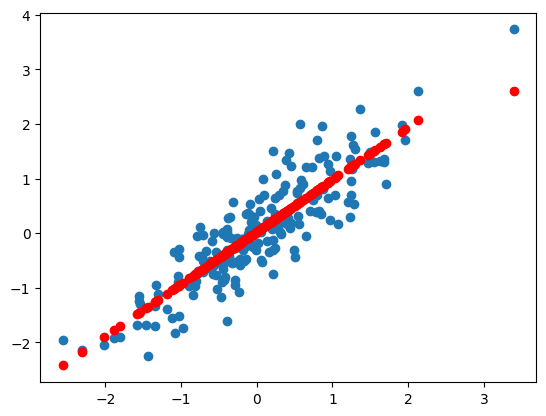

In [42]:
# plot 
plt.scatter(x, y)
plt.plot(x, predictions.detach(), "ro")
plt.show()